# Pandas Introduction

## Reading files into DataFrames

In Pandas, data is accessed through a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). A DataFrame is a 2D data structure where each column may contain different data types, from numeric series to complex structures. In most cases, you can think on DataFrames as _tables_.

The [IO API](https://pandas.pydata.org/pandas-docs/stable/io.html) has different methods to read different formats, most common one is text-delimited files:

In [1]:
import pandas as pd
data = pd.read_csv("goog.csv")

From this point we can access the data using different methods. For instance, `head(n)` will retrieve the first `n` columns:

In [2]:
data.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
1,2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976


DataFrame also allows _range_ expressions:

In [3]:
data[5:7]

,Date,Open,High,Low,Close,Volume,Adj Close
5,2016-06-24,675.169983,689.400024,673.450012,675.219971,4399800,675.219971
6,2016-06-23,697.450012,701.950012,687.000000,701.869995,2157400,701.869995


Single row access is done using `iloc` attribute:

In [4]:
data.iloc[5]

Date         2016-06-24
Open             675.17
High              689.4
Low              673.45
Close            675.22
Volume          4399800
Adj Close        675.22
Name: 5, dtype: object

In [5]:
data.iloc[5].Open

675.169983

All methods and attributes a DataFrame supports can be checked in the [API documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### Column Indexing

By default, `read_csv` will not assume any index in the data. In our case we have a _natural_ index in the first column, so we can read the file again to make sure it's incorporated in the DataFrame:

In [6]:
data = pd.read_csv("goog.csv", index_col=0)
data.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976


And then we can use range expressions to fetch _years_:

In [7]:
data["2016":"2015"].head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,1489600,758.880005
2015-12-30,776.599976,777.599976,766.900024,771.000000,1293300,771.000000


Or _month_ ranges:

In [8]:
data["2015-12":"2015-11"].head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-11-30,748.809998,754.929993,741.27002,742.599976,2097600,742.599976
2015-11-27,748.460022,753.409973,747.48999,750.260010,838500,750.260010


### Adding or removing columns

In [9]:
data["Diff"] = data.Close - data.Open
data[["Open", "Close", "Diff"]].head(2)

,Open,Close,Diff
Date,,,
2016-07-01,692.200012,699.210022,7.010010
2016-06-30,685.469971,692.099976,6.630005


In [10]:
del data["Diff"]
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Series

All columns in the previous DataFrame are defined as [_Series_](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). A Serie is a data bag indexed by date, in most cases.

In [11]:
data.Close[:2]

Date
2016-07-01    699.210022
2016-06-30    692.099976
Name: Close, dtype: float64

In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
type(data.Close)

pandas.core.series.Series

[Series API](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) has multiple methods, but one of the most interesting ones is the `describe` one:

In [14]:
data.Close.describe()

count    2989.000000
mean      545.555584
std       196.002935
min       100.010169
25%       435.110754
50%       537.359985
75%       625.651065
max      1220.172036
Name: Close, dtype: float64

#### Sampling

In [15]:
data.Close.sample(n=3)

Date
2015-12-16    758.090027
2011-08-15    557.230961
2016-06-09    728.580017
Name: Close, dtype: float64

#### Querying

In [16]:
data[data.Close > 1220]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-02-26,1224.002141,1228.882066,1213.762102,1220.172036,3979100,609.476541
2014-02-25,1215.942121,1224.502055,1210.422109,1220.002089,2888100,609.391653


#### Masking 

In [17]:
data.Close.where(lambda x: x > 685, -42).head(5)

Date
2016-07-01    699.210022
2016-06-30    692.099976
2016-06-29    -42.000000
2016-06-28    -42.000000
2016-06-27    -42.000000
Name: Close, dtype: float64

In [18]:
data.Close.mask(lambda x: x > 685, -42).head(5)

Date
2016-07-01    -42.000000
2016-06-30    -42.000000
2016-06-29    684.109985
2016-06-28    680.039978
2016-06-27    668.260010
Name: Close, dtype: float64

---

## Fetching data

Originally included in Pandas, now moved to its own package named [`pandas-datareader`](https://pandas-datareader.readthedocs.io/en/latest). We can install it using `pip`:

```
$ pip install pandas_datareader

```

In [19]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
msft = web.DataReader("MSFT", "google", datetime(2010, 1, 1), datetime(2016, 12, 31))
msft[:1]

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,30.62,31.1,30.59,30.95,38414185


### Caching
Data can be cached into a sqlite database to avoid repeating the query. You need to install [`request_cache`](https://requests-cache.readthedocs.io/en/latest/) package and add `session` parameter to the `DataReader` method. Try to execute this method twice:

In [20]:
import requests_cache
expire_after = timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
aapl = web.DataReader("AAPL", "google", datetime(2010, 1, 1), datetime(2016, 12, 31))
aapl[:1]

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,30.49,30.64,30.34,30.57,123432050


---

## Time-Series

Our series can be [resampled](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) to months, using mean close price for each one.

- M: Months
- Q: Quarters
- A: Years

The `resample` function just returns an object represeting the resampling. We have to pick one of the many functions to extract the value for each new of the rows generated (months, quarters or year rows).

In [21]:
series = pd.read_csv("goog.csv", header=0, index_col=0, squeeze=True, usecols=[0, 4], parse_dates=True)
series.resample("A")

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

### Padding

First thing we can do is to get the latest value known in each range, using `pad`:

In [22]:
series['2004-12-31']

Date
2004-12-31    192.790325
Name: Close, dtype: float64

In [23]:
series.resample("A").pad().head()

Date
2004-12-31    192.790325
2005-12-31    414.860723
2006-12-31    460.480804
2007-12-31    691.481171
2008-12-31    307.650529
Freq: A-DEC, Name: Close, dtype: float64

### Computing range mean, min or max values

And we can also get the mean values for each range. Instead of `pad`, use `mean` function:

In [24]:
series["2004"].mean()

151.80153629787233

In [25]:
series.resample("A").mean().head()

Date
2004-12-31    151.801536
2005-12-31    277.759564
2006-12-31    411.186004
2007-12-31    538.751362
2008-12-31    464.852813
Freq: A-DEC, Name: Close, dtype: float64

In [26]:
series.resample("A").max().head()

Date
2004-12-31    197.600333
2005-12-31    432.040752
2006-12-31    509.650860
2007-12-31    741.791259
2008-12-31    685.331181
Freq: A-DEC, Name: Close, dtype: float64

### Ploting resampled series for better understanding

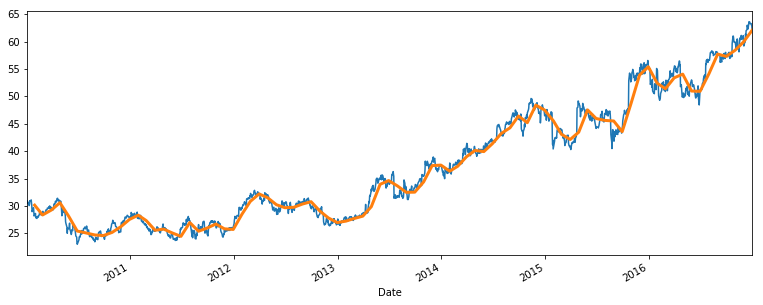

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
msft.Close.plot(figsize=(13,5))
msft.Close.resample("M").mean().plot(linewidth=3)
plt.show()

### OHLC: Open, High, Low, Close

A very interesting function is `ohlc`, that computes several values for a date range.

In [28]:
msft.Close.resample("A").ohlc()

,open,high,low,close
Date,,,,
2010-12-31,30.95,31.39,23.01,27.91
2011-12-31,27.98,28.87,23.70,25.96
2012-12-31,26.76,32.85,26.37,26.71
2013-12-31,27.62,38.94,26.46,37.41
2014-12-31,37.16,49.61,34.98,46.45
2015-12-31,46.76,56.55,40.29,55.48
2016-12-31,54.80,63.62,48.43,62.14


### Custom ranges

Every two years:

In [29]:
msft.Close.resample("2A").pad().head()

Date
2010-12-31    27.91
2012-12-31    26.71
2014-12-31    46.45
2016-12-31    62.14
Freq: 2A-DEC, Name: Close, dtype: float64

### Upsampling

Apart of grouping data (or _downsampling_) we can also calculate interpolated values. For instence, we're going to calculate values for each quarter, using `"Q"` or `"4M"` parameters.

First we need to get the data downsampled to year values, using latest one.

In [30]:
msft_year = msft.Close.resample("A").pad()
msft_year

Date
2010-12-31    27.91
2011-12-31    25.96
2012-12-31    26.71
2013-12-31    37.41
2014-12-31    46.45
2015-12-31    55.48
2016-12-31    62.14
Freq: A-DEC, Name: Close, dtype: float64

Then we can interpolate some values. Normally you would use `ffill`, optionally setting the maximum number of rows to fill before stopping propagation and filling with `NaN`.

In [31]:
rs = msft_year.resample("Q")
max_propagated = 2
pd.DataFrame({ 'mean': rs.mean(), 'ffill': rs.ffill(), 'ffill_max': rs.ffill(max_propagated) })[:9]

,ffill,ffill_max,mean
Date,,,
2010-12-31,27.91,27.91,27.91
2011-03-31,27.91,27.91,NaN
2011-06-30,27.91,27.91,NaN
2011-09-30,27.91,NaN,NaN
2011-12-31,25.96,25.96,25.96
2012-03-31,25.96,25.96,NaN
2012-06-30,25.96,25.96,NaN
2012-09-30,25.96,NaN,NaN
2012-12-31,26.71,26.71,26.71


---

## Cookbook


### Reading data file as a Series

In [32]:
series = pd.read_csv("goog.csv", header=0, index_col=0, squeeze=True, usecols=[0, 4], parse_dates=True)
series.head(2)

Date
2016-07-01    699.210022
2016-06-30    692.099976
Name: Close, dtype: float64

In [33]:
series.mean()

545.5555842261632

### Combining Series into new DataFrame

In [34]:
msft_aapl = pd.DataFrame({ 'msft': msft.Close, 'aapl': aapl.Close })
msft_aapl[:3]

,aapl,msft
Date,,
2010-01-04,30.57,30.95
2010-01-05,30.63,30.96
2010-01-06,30.14,30.77


By default it uses closed ranges.

### Column projections

In [35]:
aapl["Year"] = aapl.index.map(lambda d: d.year)
aapl[:2]

,Open,High,Low,Close,Volume,Year
Date,,,,,,
2010-01-04,30.49,30.64,30.34,30.57,123432050,2010
2010-01-05,30.66,30.80,30.46,30.63,150476004,2010


### Using custom indexes

In [36]:
dates = pd.date_range('2015-10', '2016-02', freq='M')
dates

DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31'], dtype='datetime64[ns]', freq='M')

In [37]:
from pandas import Series
Series(series, index=dates)

2015-10-31           NaN
2015-11-30    742.599976
2015-12-31    758.880005
2016-01-31           NaN
Freq: M, Name: Close, dtype: float64

### Install packages in Azure Notebooks

Very simple, use `pip` or `conda`:

`!pip install package_name`.